In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
test_data=pd.read_csv("test.csv")
train_data=pd.read_csv("train.csv")

In [3]:
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

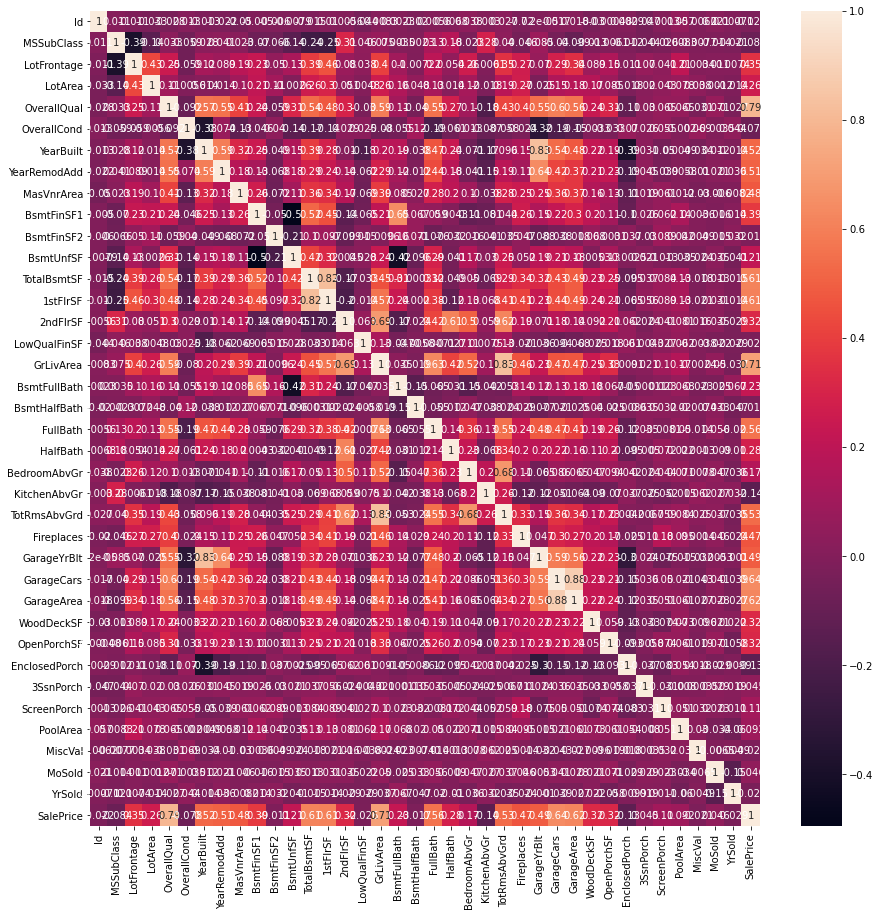

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,ax=ax)

In [5]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
#removing Nan columns
def Nan_dropper(df):
    return df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)
    

In [7]:
train_data=Nan_dropper(train_data)
test_data=Nan_dropper(test_data)

In [8]:
def corr_dropper(df):
    for i in df.head():
        if i not in correlated_features_lis:
            df=df.drop(i,axis=1)
    return df

In [9]:
def Nan_filler(df):
    cols=[x for x in df.head()]
    for i in cols:
        df[i]=df[i].fillna(0)
    
    return df

In [10]:
#filling Nans
cols=[x for x in train_data.head()]
for i in cols:
    train_data[i]=train_data[i].fillna(0)
train_data.describe()

    

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
correlated_features = set()
corrleation_matrix = train_data.corr()

for i in range(len(corrleation_matrix.columns)):
    for j in range(i):
        if abs(corrleation_matrix.iloc[i,j]) > 0.05:
            colname = corrleation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features_lis = list(correlated_features)
print(correlated_features_lis)

['PoolArea', 'BsmtUnfSF', 'Fireplaces', '3SsnPorch', 'ScreenPorch', 'KitchenAbvGr', '2ndFlrSF', 'YearRemodAdd', 'HalfBath', 'GarageArea', 'OverallCond', 'BsmtHalfBath', '1stFlrSF', 'GarageYrBlt', 'MasVnrArea', 'WoodDeckSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtFinSF2', 'LotArea', 'OpenPorchSF', 'FullBath', 'GrLivArea', 'BedroomAbvGr', 'OverallQual', 'TotRmsAbvGrd', 'MoSold', 'LowQualFinSF', 'GarageCars', 'BsmtFinSF1', 'SalePrice', 'MiscVal', 'YearBuilt', 'YrSold', 'EnclosedPorch', 'LotFrontage']


In [12]:
train_data=corr_dropper(train_data)
train_data=Nan_filler(train_data)
test_data=corr_dropper(test_data)
test_data=Nan_filler(test_data)

In [13]:
obj=[]
for i in train_data.columns:
    print(train_data[i].dtype)
    if train_data[i].dtype=="object" :
        obj.append(i)
print(obj)  

float64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
[]


In [14]:
def label(df):
    l=LabelEncoder()
    for i in obj:
        df[i]=l.fit_transform(df[i].astype(str))
        df[i]=l.fit_transform(df[i].astype(str))
    return df


In [15]:
test_data=label(test_data)
train_data=label(train_data)

C:\Users\anant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


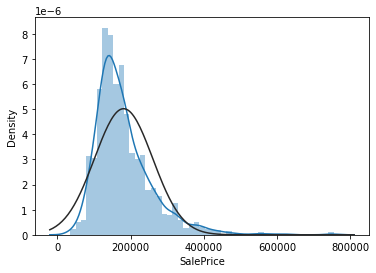

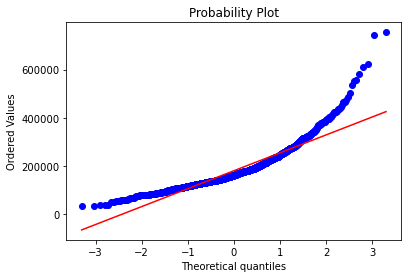

In [16]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train_data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [17]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

C:\Users\anant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


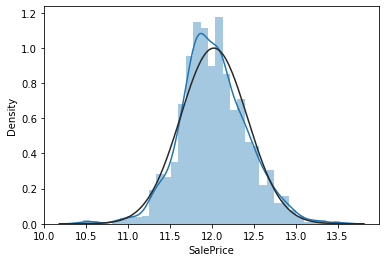

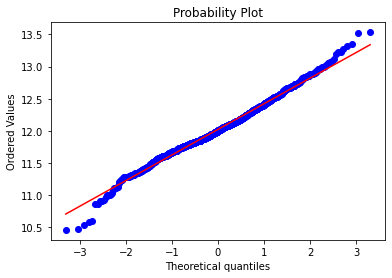

In [18]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train_data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [19]:
X=train_data.drop("SalePrice",axis=1)
y=train_data["SalePrice"]

In [20]:
#sc = StandardScaler()
#X = sc.fit_transform(X)
print(Nan_filler(X))

      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF

In [21]:
X.shape

(1460, 35)

In [22]:
y.shape

(1460,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred=np.expm1(y_pred)
y_test=np.expm1(y_test)
print(y_pred)
print('\n')
print(y_test)

[189625.40815602 142844.40951858 102672.90947884 223458.21653054
  86204.82028662 104677.73610248 260199.73234784 124639.72833076
 429772.37469131 151595.23139511 185200.37225659 147694.26146251
 222395.97501271 113504.3766039  128932.23304916 145058.34525067
 223901.91080912 112738.82041776 140143.10468081 178302.90031647
 126742.63967033 143096.95364348 121053.81063111 163520.31183633
 181842.10031351 204786.14537051 166959.17986751  76067.02127618
 331143.27046274 117801.70817382 138024.25540808 190008.08859653
 138597.73661893 296970.91628566 334366.72387404 180912.1951419
 266796.84161881 125235.59094857 231245.18487832 296559.49260865
 200567.39599227 125478.28318577 178455.24541681 295301.92493769
 326010.08031301 142898.6976032  127633.92065361 128706.11519608
 171038.38051152  95967.17400323 382661.39178262 144372.64708211
 163730.73280943  87696.38001408 257887.07416841 111108.81604095
 126709.23878403 242601.38561314 146774.48007702 100630.89209061
 141228.49659646 131736.66

In [25]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 17849.38995763579
Mean Squared Error (MSE): 1025195135.5331533
Root Mean Squared Error (RMSE): 32018.668547164063
Mean Absolute Percentage Error (MAPE): 9.61
Accuracy: 90.39


In [26]:
test=pd.read_csv("test.csv")
test=label(Nan_filler(corr_dropper(test)))
y_pred=regressor.predict(test)
y_pred=np.expm1(y_pred)

In [27]:
submission = pd.DataFrame({'SalePrice': y_pred})
submission.insert(0, 'Id', range(1461, 1461 + len(submission)))
submission.to_csv("House_Price_Prediction.csv",index = False)